## Introduction to Statistics in Python

**Course Structure:**
* Chapter 1. Summary Statistics
* Chapter 2. Random Number and Statistics
* Chapter 3. More Distributions and Central Limit Theorem
* Chapter 4. Correlation and Experimental Design

### CHAPTER 1. Summary Statistics

#### Part 1.1 Descriptive and inferential statistics

**Statistics:**
* It is the practice and study of **collecting and analyzing data**
* Summary statistics -> fact about or summary of some data
* Two branches of statistics:
    1. Descriptive statistics -> describing and summarizing data
    2. Inferential statistics -> use a sample of data to make *inferences* about a larger population
* Types of data:
    1. Numeric (continuous or discrete)
    2. Categorical (nominal or ordinal)

#### Part 1.2 Measure of center

* Histogram is a great way to visually summarize the data
* The centers of the data:
    * Mean -> add up all values and divide by the total number of points
    * Median -> 50% of the data is lower than it, 50% of the data is higher
    * Mode -> the most frequent value
* Mean is more sensitive to extreme values, it works better for symmetrical data
* If the data is skewed, median is usually better to use

In [50]:
# prepare data 
import pandas as pd
import numpy as np

# get the data
file_names = ['7_datasets/country.txt', '7_datasets/food_category.txt', '7_datasets/consumption.txt', '7_datasets/co2_emission.txt']

# country = []
with open('7_datasets/country.txt', 'r') as file:
    country = file.read()
        # cleaned_line = line.replace('[', '').replace(']', '').replace('"', '').replace('\n', '')
        # country.append(cleaned_line)   
# country = np.loadtxt(country)

country = country.replace("'", "").replace('[', '').replace(']', '').replace(' ', '').replace('\n', '')
country = country.split(',')

# food_category = []
with open('7_datasets/food_category.txt', 'r') as file:
    food_category = file.read()
    # for line in file:
    #     cleaned_line = line.replace('[', '').replace(']', '').replace('"', '').replace('\n', '')
    #     food_category.append(cleaned_line)
# food_category = np.loadtxt(food_category)
food_category = food_category.replace("'", "").replace('[', '').replace(']', '').replace(' ', '').replace('\n', '')
food_category = food_category.split(',')

consumption = []
with open('7_datasets/consumption.txt', 'r') as file:
    for line in file:
        cleaned_line = line.replace('[', '').replace(']', '').replace(',', '')
        consumption.append(cleaned_line)
consumption = np.loadtxt(consumption)

co2_emission = []
with open('7_datasets/co2_emission.txt', 'r') as file:
    for line in file:
        cleaned_line = line.replace('[', '').replace(']', '').replace(',', '')
        co2_emission.append(cleaned_line)  
co2_emission = np.loadtxt(co2_emission)
        
food_consumption = pd.DataFrame({'country':country,
                                 'food_category':food_category,
                                 'consumption':consumption,
                                 'co2_emission': co2_emission})
print(food_consumption.head())
food_consumption.to_csv('7_datasets/food_consumption.csv', index=False, header=1)

     country food_category  consumption  co2_emission
0  Argentina          pork        10.51         37.20
1  Argentina       poultry        38.66         41.53
2  Argentina          beef        55.48       1712.00
3  Argentina     lamb_goat         1.56         54.63
4  Argentina          fish         4.36          6.96


In [51]:
# Code for part 1.2

# mean and median
import numpy as np
import pandas as pd

# load the data
food_consumption = pd.read_csv('7_datasets/food_consumption.csv')


# filter for Belgium
be_consumption = food_consumption[food_consumption['country'] == 'Belgium']


# filter for USA
usa_consumption = food_consumption[food_consumption['country'] == 'USA']

# calculate mean and median consumption in Belgium
print(be_consumption['consumption'].agg(np.mean))
print(be_consumption['consumption'].agg(np.median))

# calculate mean and median consumption in USA
print(usa_consumption['consumption'].agg(np.mean))
print(usa_consumption['consumption'].agg(np.median))

42.13272727272727
12.59
44.650000000000006
14.58


In [52]:
# Code for part 1.2 (continue)

# subset for Belgium and USA only
be_and_usa = food_consumption[(food_consumption['country'] == 'Belgium') | (food_consumption['country'] == 'USA')]

# group by country, select consumption column, and compute mean and median
print(be_and_usa.groupby('country')['consumption'].agg([np.mean, np.median]))

              mean  median
country                   
Belgium  42.132727   12.59
USA      44.650000   14.58


mean      37.591615
median    15.200000
Name: co2_emission, dtype: float64


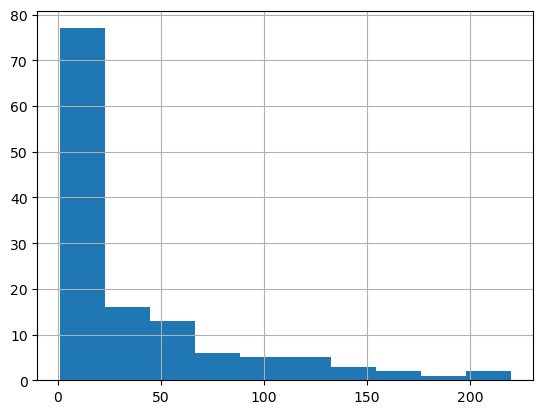

In [53]:
# Code for part 1.2 (continue)

# mean vs. median
import matplotlib.pyplot as plt

# subset for food_category equals rice
rice_consumption = food_consumption[food_consumption['food_category'] == 'rice']

# calculate mean and median of co2_emission with .agg()
print(rice_consumption['co2_emission'].agg([np.mean, np.median]))

# histogram of co2_emission for rice and show plot
rice_consumption['co2_emission'].hist()
plt.show()

#### Part 1.3 Measure of spread

* Spread describes how spread apart or close together the data points are
* A few different measures of spread:
    * Variance -> distance of data points to mean
    * Standard deviation -> square root of the variance
    * Mean absolute deviation -> absolute value of the distance to the mean
    * Interquartile range (IQR) -> distance between 25th and 75th percentile
    * Outliers -> $data < Q1 - 1.5 \times IQR$; $data > Q3 + 1.5 \times IQR$

In [54]:
# Code for part 1.3

# quartiles, quantiles, and quintiles
import pandas as pd
import numpy as np

# load the data
food_consumption = pd.read_csv('7_datasets/food_consumption.csv')

# calculate the quartiles of co2_emission
print(np.quantile(food_consumption['co2_emission'], [0, 0.25, 0.5, 0.75, 1]))

# calculate the quintiles of co2_emission
# print(np.quantile(food_consumption['co2_emission'], [0, 0.2, 0.4, 0.6, 0.8, 1]))
print(np.quantile(food_consumption['co2_emission'], np.linspace(0, 1, 6)))

# calculate the deciles of co2_emission
print(np.quantile(food_consumption['co2_emission'], np.linspace(0, 1, 11)))

[   0.        5.21     16.53     62.5975 1712.    ]
[   0.       3.54    11.026   25.59    99.978 1712.   ]
[0.00000e+00 6.68000e-01 3.54000e+00 7.04000e+00 1.10260e+01 1.65300e+01
 2.55900e+01 4.42710e+01 9.99780e+01 2.03629e+02 1.71200e+03]


                        var         std
food_category                          
beef           88748.408132  297.906710
dairy          17671.891985  132.935669
eggs              21.371819    4.622966
fish             921.637349   30.358481
lamb_goat      16475.518363  128.356996
nuts              35.639652    5.969895
pork            3094.963537   55.632396
poultry          245.026801   15.653332
rice            2281.376243   47.763754
soybeans           0.879882    0.938020
wheat             71.023937    8.427570


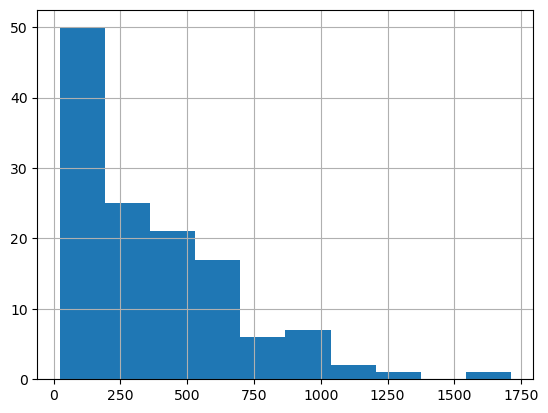

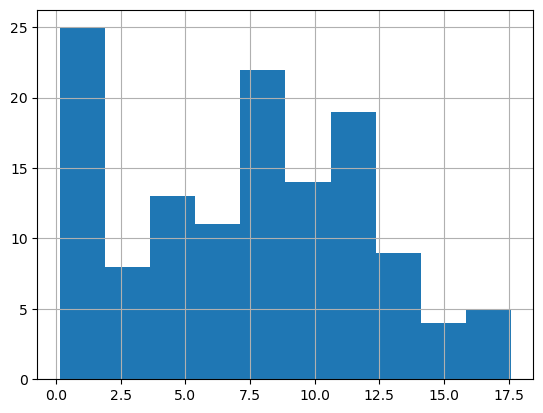

In [55]:
# Code for part 1.3 (continue)

# variance and standard deviation
import numpy as np
import matplotlib.pyplot as plt

# print variance and sd of co2_emission for each food_category
print(food_consumption.groupby('food_category')['co2_emission'].agg([np.var, np.std]))

# create histogram of co2_emission for food_category 'beef'
food_consumption[food_consumption['food_category'] == 'beef']['co2_emission'].hist()
plt.show()

# create histogram of co2_emission for food_category 'eggs'
food_consumption[food_consumption['food_category'] == 'eggs']['co2_emission'].hist()
plt.show()

In [56]:
# Code for part 1.3 (continue)

# finding outliers using IQR
import pandas as pd
import numpy as np

# load the data
food_consumption = pd.read_csv('7_datasets/food_consumption.csv')

# calculate total co2_emission per country: emission_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].agg(np.sum)
# print(emissions_by_country)

# compute the first and third quartiles and IQR of emissions_by_country
q1 = np.quantile(emissions_by_country, 0.25)
q3 = np.quantile(emissions_by_country, 0.75)
iqr = q3 - q1

# calculate the lower and upper cutoffs for outliers
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

# subset emissions_by_country to find outliers
outliers = emissions_by_country[(emissions_by_country < lower) | (emissions_by_country > upper)]
print(outliers)

country
Argentina    2172.4
Name: co2_emission, dtype: float64


### CHAPTER 2. Random Numbers and Probability

#### Part 2.1 What are chances?

* Chance is the probability of an event
* *'.sample()'* method randomly samples one row from the dataframe in Python
* To ensure a reproducible result, we need to set a random seed with *'np.random.seed()'*
* Sampling can be done **with or without a replacement**
* **Independent events** are two events that are **not affected** by each other

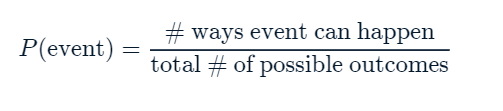

In [57]:
# display probability
from IPython import display

display.Image("Images/probability.png")

In [58]:
# prepare data
import pandas as pd
import numpy as np

# product
with open('7_datasets/product.txt', 'r') as file:
    product = file.read()
product = product.replace("'", "").replace('[', '').replace(']', '').replace(' ', '').replace('\n', '')
product = product.split(',')

# client
with open('7_datasets/client.txt', 'r') as file:
    client = file.read()
client = client.replace("'", "").replace('[', '').replace(']', '').replace(' ', '').replace('\n', '')
client = client.split(',')

# status
with open('7_datasets/status.txt', 'r') as file:
    status = file.read()

status = status.replace("'", "").replace('[', '').replace(']', '').replace(' ', '').replace('\n', '')
status = status.split(',')

# amount
amount = []
with open('7_datasets/amount.txt', 'r') as file:
    for line in file:
        cleaned_line = line.replace('[', '').replace(']', '').replace(',', '')
        amount.append(cleaned_line)
amount = np.loadtxt(amount)

# num_users
num_users = []
with open('7_datasets/num_users.txt', 'r') as file:
    for line in file:
        cleaned_line = line.replace('[', '').replace(']', '').replace(',', '')
        num_users.append(cleaned_line)
num_users = np.loadtxt(num_users)

amir_deals = pd.DataFrame({'product':product,
                                 'client':client,
                                 'status':status,
                                 'amount': amount,
                                 'num_users': num_users})
print(amir_deals.head())
amir_deals.to_csv('7_datasets/amir_deals.csv', index=False, header=1)

    product   client status   amount  num_users
0  ProductF  Current    Won  7389.52       19.0
1  ProductC      New    Won  4493.01       43.0
2  ProductB      New    Won  5738.09       87.0
3  ProductI  Current    Won  2591.24       83.0
4  ProductE  Current    Won  6622.97       17.0


In [59]:
# Code for part 2.1 

# calculating probabilities
import pandas as pd
import numpy as np

# get the data
amir_deals = pd.read_csv('7_datasets/amir_deals.csv')

# count the deals for each product
counts = amir_deals['product'].value_counts()
print(counts)

# calculate the probability of picking a deal with each product
probs = counts/ counts.sum()
print(probs)

# set random seed
np.random.seed(24)

# sample 5 deals without replacement
sample_without_replacement = amir_deals.sample(5, replace=False)
print(sample_without_replacement)

# sample 5 deals with replacement
sample_with_replacement = amir_deals.sample(5, replace=True)
print(sample_with_replacement)

product
ProductB    62
ProductD    40
ProductA    23
ProductC    15
ProductF    11
ProductH     8
ProductI     7
ProductE     5
ProductN     3
ProductG     2
ProductJ     2
Name: count, dtype: int64
product
ProductB    0.348315
ProductD    0.224719
ProductA    0.129213
ProductC    0.084270
ProductF    0.061798
ProductH    0.044944
ProductI    0.039326
ProductE    0.028090
ProductN    0.016854
ProductG    0.011236
ProductJ    0.011236
Name: count, dtype: float64
      product   client status   amount  num_users
127  ProductB  Current    Won  2070.25        7.0
148  ProductD  Current    Won  3485.48       52.0
77   ProductB  Current    Won  6252.30       27.0
104  ProductD  Current    Won  4110.98       39.0
166  ProductC      New   Lost  3779.86       11.0
      product   client status   amount  num_users
133  ProductD  Current    Won  5992.86       98.0
101  ProductH  Current    Won  5116.34       63.0
110  ProductB  Current    Won   696.88       44.0
49   ProductB  Current    Won  348

#### Part 2.2 Discrete distributions

* **Probability distribution** describes the probability of each possible outcome in a scenario
* Calculate probabilities of different outcomes by taking **areas** of the probability distribution **(probability = area)**
* **Discrete distributions** represent situations with **discrete outcomes**
* **Law of large numbers**: As the size of your sample increases, the sample mean will approach the expected value

In [60]:
# prepare the data

import pandas as pd
group_id = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
group_size = [2, 4, 6, 2, 2, 2, 3, 2, 4, 2]

restaurant_groups = pd.DataFrame({'group_id': group_id,
                                  'group_size': group_size})
restaurant_groups.to_csv('7_datasets/restaurant_groups.csv', index=False, header=1)

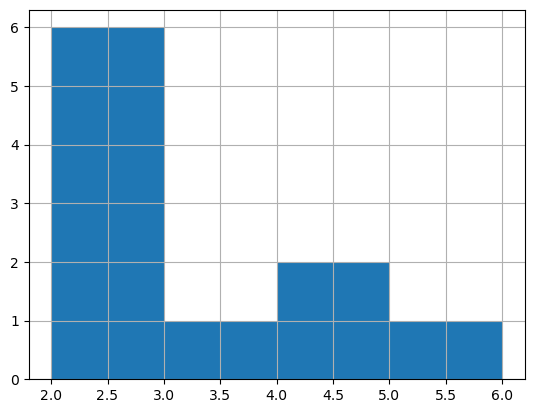

In [61]:
# Code for part 2.2

# creating a probability distribution
import pandas as pd
import matplotlib.pyplot as plt

# get the data
restaurant_groups = pd.read_csv('7_datasets/restaurant_groups.csv')

# create a histogram of restaurant_groups and show plot
restaurant_groups['group_size'].hist(bins=[2, 3, 4, 5, 6])
plt.show()

In [62]:
# create a probability distribution

size_dist = restaurant_groups['group_size'].value_counts() / len(restaurant_groups['group_size'])
# print(size_dist)

# reset index and rename columns
size_dist = size_dist.reset_index()
size_dist.columns = ['group_size', 'prob']
print(size_dist)

# calculate expected value
expected_value = sum(size_dist['group_size'] * size_dist['prob'])
print('Expected value:', expected_value)

# subset groups of size 4 or more
groups_4_or_more = size_dist[size_dist['group_size'] >= 4]
print(groups_4_or_more)

# sum the probabilities of groups_4_or_more
prob_4_or_more = sum(groups_4_or_more['prob'])
print(prob_4_or_more)

   group_size  prob
0           2   0.6
1           4   0.2
2           6   0.1
3           3   0.1
Expected value: 2.9000000000000004
   group_size  prob
1           4   0.2
2           6   0.1
0.30000000000000004


#### Part 2.3 Continuous distribution

* Example: Waiting for the bus (random time)
* The probability distribution is similar to discrete distribution
* We can't create individual blocks because it has no discrete variable
* Again, **probability still = area**
* *'from scipy.stats import uniform'* module
* Use *'uniform.cdf()'* method to calculate the less than probability
* Generate random numbers according to uniform distribution with *'uniform.rvs()'* method

In [63]:
# Code for part 2.3

# data back-ups
from scipy.stats import uniform

# set limits
min_time = 0
max_time = 30

# calculate the probability of waiting less than 5 mins
prob_less_than_5 = uniform.cdf(5, min_time, max_time)
print(prob_less_than_5)

# calculate the probability of waiting more than 5 mins
prob_greater_than_5 = 1 - uniform.cdf(5, min_time, max_time)
print(prob_greater_than_5)

# calculate the probability of waiting 10-20 mins
prob_between_10_and_20 = uniform.cdf(20, min_time, max_time) - uniform.cdf(10, min_time, max_time)
print(prob_between_10_and_20)



0.16666666666666666
0.8333333333333334
0.3333333333333333


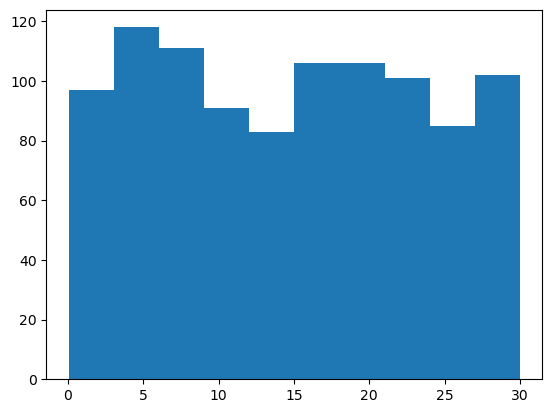

In [64]:
# Code for part 2.3 (continue)

# simulating wait times
import numpy as np
from scipy.stats import uniform
import matplotlib.pyplot as plt

# set random seed to 334
np.random.seed(334)

# generate 1000 wait times between 0 and 30 mins
wait_times = uniform.rvs(min_time, max_time, size=1000)

# create a histogram of simulated times and show plot
plt.hist(wait_times)
plt.show()

#### Part 2.4 Binomial distribution

* It starts with an event has **binary outcomes**
* The binomial distribution describes the probability of the number of successes in a sequence of independent trails
* Described by $n$ and $p$:
    * $n$: total number of trails
    * $p$: probability of success
* Expected value: $ n \times p $
* Use *'from scipy.stats import binom'* module 
* Use *'binom.rvs()'* to generate/simulate binomial distribution
* Use *'binom.pmf()'* to get the probability of a certain amount of success
* Use *'binom.cdf()'* to get the probability of fewer than a certain amount of success

In [65]:
# Code for part 2.4

# simulating sales deals
import numpy as np
from scipy.stats import binom

# set random seed to 10
np.random.seed(10)

# simulate a single deal
print(binom.rvs(1, 0.3, size=1))

# simulate 1 week of 3 deals
print(binom.rvs(3, 0.3, size=1))

# simulate 52 weeks of 3 deals
deals = binom.rvs(3, 0.3, size=52)

# print mean deals won per week
print(np.mean(deals))

[1]
[0]
0.8461538461538461


In [66]:
# Code for part 2.4 (continue)

# calculating binomial distribution
from scipy.stats import binom

# probability of closing 3 out of 3 deals
prob_3 = binom.pmf(3, 3, 0.3)
print(prob_3)

# probability of closing <=1 out of 3 deals
prob_less_or_equal_1 = binom.cdf(1, 3, 0.3)
print(prob_less_or_equal_1)

# probability of clsoing >1 out of 3 deals
prob_greater_than_1 = 1 - binom.cdf(1, 3, 0.3)
print(prob_greater_than_1)

0.026999999999999996
0.784
0.21599999999999997


In [67]:
# Code for part 2.4 (continue)

# how many sales will be won?
from scipy.stats import binom

# expected number won with 30% win rate
won_30pct = 3 * 0.3

# expected number won with 25% win rate
won_25pct = 3 * 0.25

# expected number won with 35% win rate
won_35pct = 3 * 0.35

### CHAPTER 3. More Distributions and the Central Limit Theorem

#### Part 3.1 The normal distribution

* It is the most important distribution
* Its shape is referred to as a "bell curve"
* Properties:
    1. Symmetric
    2. Area = 1
    3. Curve never hits 0
* Described by mean and standard deviation:
    * When mean = 0 and standard deviation = 1, it's called **standard normal distribution**
    * 68% of the area is within 1 standard deviation of the mean
    * 95% of the area is within 2 standard deviations of the mean 
    * 99.7% of the area is within 3 standard deviations of the mean
* Use *'from scipy.stats import norm'* module
* Use *'norm.cdf()'* to calculate less than probability
* Use *'norm.ppf()'* to calculate the value in a certain less than percentage (inverse of cdf)
* Use *'norm.rvs()'* to generate/simulate normal distribution


    product   client status   amount  num_users
0  ProductF  Current    Won  7389.52       19.0
1  ProductC      New    Won  4493.01       43.0
2  ProductB      New    Won  5738.09       87.0
3  ProductI  Current    Won  2591.24       83.0
4  ProductE  Current    Won  6622.97       17.0


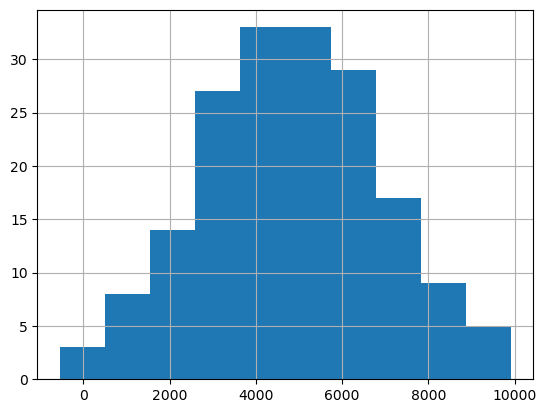

In [68]:
# Code for part 3.1

# distribution of Amir's sales
import pandas as pd
import matplotlib.pyplot as plt

# get the data
amir_deals = pd.read_csv('7_datasets/amir_deals.csv')
print(amir_deals.head())

# histogram of amount with 10 bins and show plot
amir_deals['amount'].hist(bins=10)
plt.show()


In [69]:
# Code for part 3.1 (continue)

# probabilities from the normal distribution
from scipy.stats import norm

# probability of deal < 7500
prob_less_7500 = norm.cdf(7500, 5000, 2000)
print(prob_less_7500)

# probability of deal > 1000
prob_over_1000 = 1 - norm.cdf(1000, 5000, 2000)
print(prob_over_1000)

# probability of deal between 3000 and 7000
prob_3000_to_7000 = norm.cdf(7000, 5000, 2000) - norm.cdf(3000, 5000, 2000)
print(prob_3000_to_7000)

# calculate amount that 25% of deals will be less than
pct_25 = norm.ppf(0.25, 5000, 2000)
print(pct_25)

0.8943502263331446
0.9772498680518208
0.6826894921370859
3651.0204996078364


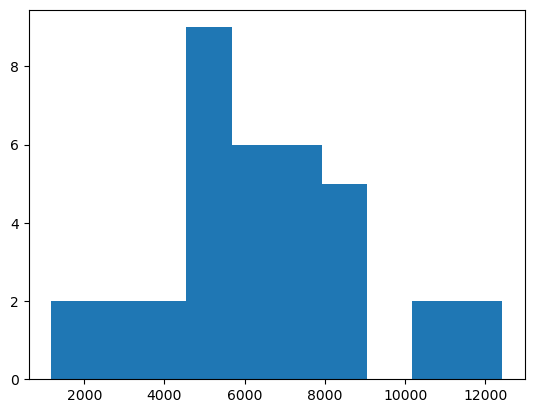

In [70]:
# Code for part 3.1 (continue)

# simulating sales under new market conditions
from scipy.stats import norm
import matplotlib.pyplot as plt

# calculate new average amount
new_mean = 5000 * 1.2

# calculate new standard deviation
new_sd = 2000 * 1.3

# simulate 36 sales
new_sales = norm.rvs(new_mean, new_sd, 36)

# create histogram and plot
plt.hist(new_sales)
plt.show()

#### Part 3.2 The central limit theorem

* Example: roll the dice 5 times and take the mean, repeat 10 times
* The result is a sampling distribution of the sample mean

**Central limit theorem:**
* The sampling distribution of a statistic becomes closer to the normal distribution as the number of trails increases
* Samples should be random and independent
* It can be used to estimate characteristics of large population

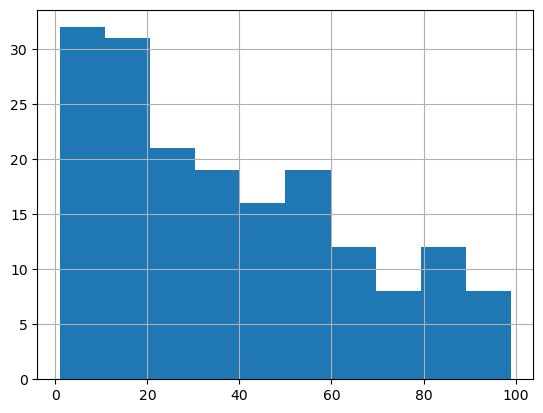

32.0


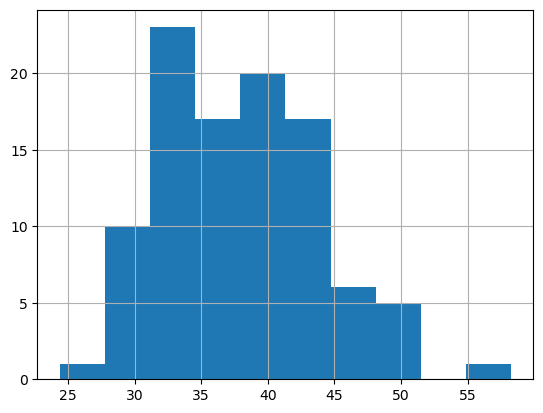

In [71]:
# Code for part 3.2

# the CLT in action
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# get the data
amir_deals = pd.read_csv('7_datasets/amir_deals.csv')

# create a histogram of num_users and show
amir_deals['num_users'].hist()
plt.show()

# set seed to 104
np.random.seed(104)

# sample 20 num_users with replacement from amir_deals
samp_20 = amir_deals['num_users'].sample(20, replace=True)

# take mean of samp_20
print(np.mean(samp_20))

sample_means = []
# loop 100 times
for i in range(100):
    samp_20 = amir_deals['num_users'].sample(20, replace=True)
    samp_20_mean = np.mean(samp_20)
    sample_means.append(samp_20_mean)
    
# convert to series and plot histogram
sample_means_series = pd.Series(sample_means)
sample_means_series.hist()
plt.show()

In [72]:
# prepare data for all_deals
import pandas as pd
import numpy as np

# product
with open('7_datasets/product_2.txt', 'r') as file:
    product = file.read()
product = product.replace("'", "").replace('[', '').replace(']', '').replace(' ', '').replace('\n', '')
product = product.split(',')

# num_users
num_users = []
with open('7_datasets/num_users_2.txt', 'r') as file:
    for line in file:
        cleaned_line = line.replace('[', '').replace(']', '').replace(',', '')
        num_users.append(cleaned_line)
num_users = np.loadtxt(num_users)

# create dataframe
all_deals = pd.DataFrame({'product': product,
                          'num_users': num_users})
all_deals.to_csv('7_datasets/all_deals.csv', index=False, header=1)
    

In [74]:
# Code for part 3.2 (continue)

# the mean of means
import pandas as pd
import numpy as np

# get the data
amir_deals = pd.read_csv('7_datasets/amir_deals.csv')
all_deals = pd.read_csv('7_datasets/all_deals.csv')

# set seed to 321
np.random.seed(321)

sample_means = []
# loop 30 times to take 30 means
for i in range(30):
    cur_sample = all_deals['num_users'].sample(20, replace=True)
    cur_mean = np.mean(cur_sample)
    sample_means.append(cur_mean)
    
print(np.mean(sample_means))
print(np.mean(amir_deals['num_users']))

# amir's mean is close t overall average!

38.31333333333332
37.651685393258425


#### Part 3.3 The Poisson distribution

* Poisson processes: events appear to happen at a certain rate, but completely at random
* Examples: number of animals adopted from an animal shelter per week
* Poisson distribution describes the probability of some # of events occuring over a fixed period of time
* It is described by $\lambda$:
    * $\lambda$ = average number of events per time interval
* Use *'from scipy.stats import poisson'* module
* Use *'poisson.pmf()'* to get probability of a certain number
* Use *'poisson.cdf()'* to get probability of less than a certain number
* Use *'poisson.rvs()'* to generate/simulate a Poisson distribution

In [ ]:
# Code for part 3.3

# tracking lead responses
from scipy.stats import poisson

# probability of 5 responses of average 4
prob_5 = poisson.pmf(5, 4)
print(prob_5)

# probability of 5 responses of average 5.5
prob_coworker = poisson.pmf(5, 5.5)
print(prob_coworker)

# probability of 2 or fewer responses of average 4
prob_2_or_less = poisson.cdf(2, 4)
print(prob_2_or_less)

# probability of > 10 responses
prob_over_10  = 1 - poisson.cdf(10, 4)
print(prob_over_10)

#### Part 3.4 More probability distributions

* 